<a href="https://colab.research.google.com/github/Jieoi/traffic_sign/blob/main/taffic_sign_Training_data_preparation_RRDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset

<h2>1. Data preparetion</h2>

Firstly, the dataset is obtained from [here](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html), the German Traffic Sign Recognition Benchmark GTSRB dataset. The file downloaded includes training images with lable, test images, and ground truth for the test images.

The path to the dataset is loaded below, the code has been modified to link to the downloaded dataset from my Google drive.

In [23]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
import shutil
import os

# List of directories to be deleted
directories_to_delete = [
    '/content/augmented_images'
]

# Iterate through the list of directories and delete them
for directory_to_delete in directories_to_delete:
    if os.path.exists(directory_to_delete):
        shutil.rmtree(directory_to_delete)
        print(f"Directory '{directory_to_delete}' and its contents have been deleted.")
    else:
        print(f"Directory '{directory_to_delete}' does not exist.")


Directory '/content/augmented_images' does not exist.


In [25]:
import sys

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

import cv2

import pandas as pd

In [26]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/getFile.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [27]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/testGetFile.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

In [28]:
!python drive/MyDrive/final/data_preparation/testGetFile.py

.Extraction complete.
....
----------------------------------------------------------------------
Ran 5 tests in 0.011s

OK


In [29]:
# Import the extract_zip_to_directory function from getFile.py
from getFile import extract_zip_to_directory

# Define file paths
root_path = '/content/drive/MyDrive'
zip_filename = os.path.join(root_path, 'GTSRB/GTSRB.zip')
extract_dir = "/content/GTSRB"

# Call the function
extract_zip_to_directory(zip_filename, extract_dir)

Extraction complete.


In [30]:
# Assign the paths
train_directory = os.path.join(extract_dir, 'GTSRB', 'GTSRB-Training_fixed', 'GTSRB', 'Training')

print("train_directory:", train_directory)

train_directory: /content/GTSRB/GTSRB/GTSRB-Training_fixed/GTSRB/Training


The test images is first extracted and stored as numpy arrays:

In [31]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_preparation/getData.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import getData

In [32]:
images, labels = getData.load_and_process_training_images(train_directory)

# Now you can work with the 'images' and 'labels' variables
# For example:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Loaded 26640 images and 26640 labels in 3.1761770248413086 seconds.
Number of images: 26640
Number of labels: 26640


In [33]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
label_distribution = dict(zip(unique_labels, label_counts))

# Extract labels and counts from the label distribution dictionary
labels_list = list(label_distribution.keys())
counts = list(label_distribution.values())

# Sort labels and counts by label names
sorted_indices = np.argsort(labels_list)
labels_list = np.array(labels_list)[sorted_indices]
counts = np.array(counts)[sorted_indices]

In [34]:
# Calculate statistics
total_images = sum(counts)
average_images = total_images / len(unique_labels)
median_images = np.median(counts)
std_deviation = np.std(counts)
min_index = np.argmin(counts)
max_index = np.argmax(counts)

# Get labels for minimum and maximum values
min_label = labels_list[min_index]
max_label = labels_list[max_index]
min_images = counts[min_index]
max_images = counts[max_index]


# Print statistics
print(f"Average number of images per label: {average_images:.2f}")
print(f"Median number of images per label: {median_images}")
print(f"Standard deviation of images per label: {std_deviation:.2f}")
print(f"Minimum number of images: {min_images} for label '{min_label}'")
print(f"Maximum number of images: {max_images} for label '{max_label}'")

Average number of images per label: 619.53
Median number of images per label: 420.0
Standard deviation of images per label: 457.35
Minimum number of images: 150 for label '0'
Maximum number of images: 1500 for label '1'


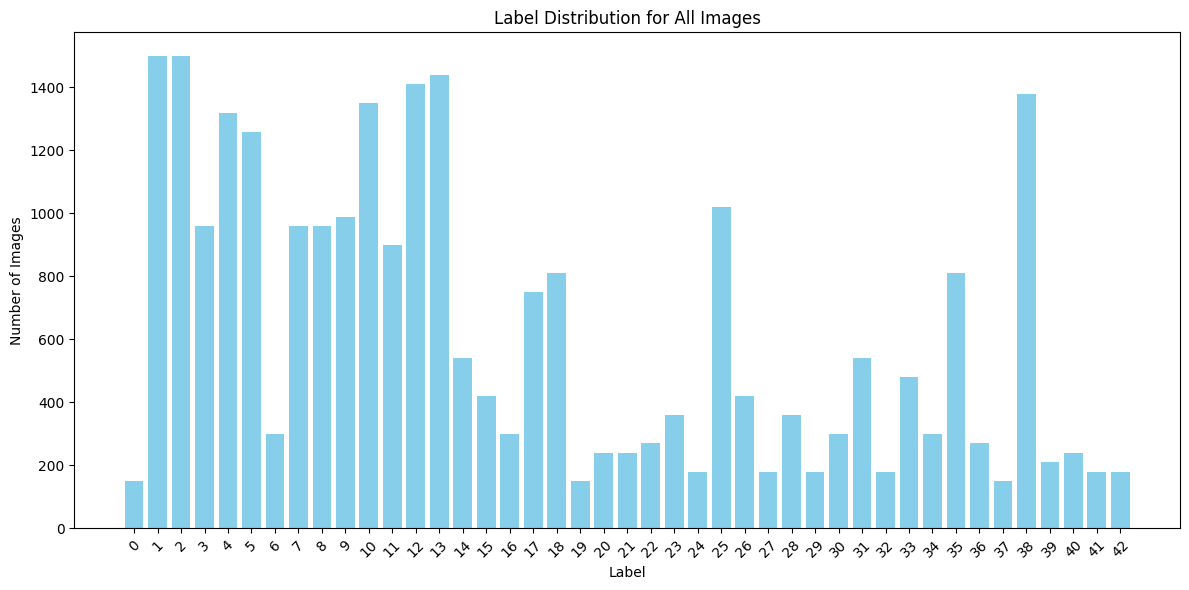

In [35]:
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels_list, counts, tick_label=labels_list, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Label Distribution for All Images')
plt.xticks(labels_list, rotation=45)
plt.tight_layout()

plt.show()

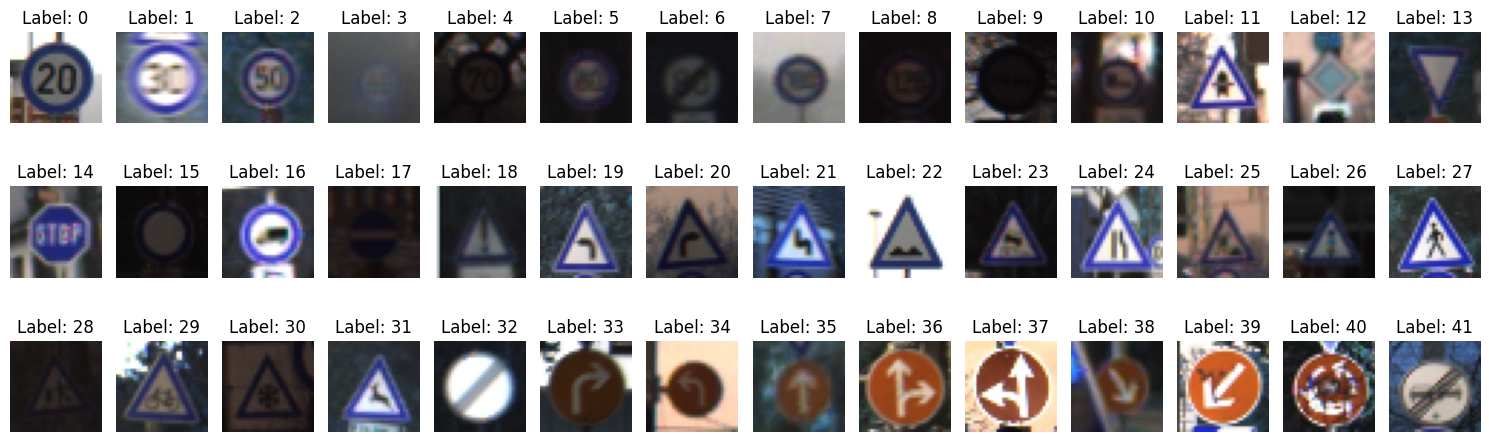

In [36]:
# Display one image from each label
num_rows = 3
num_columns = 14
num_images_to_display = num_rows * num_columns

# Create a figure with the desired number of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
    if i < len(np.unique(labels)):
        label = np.unique(labels)[i]
        label_indices = np.where(labels == label)[0]

        # Check if there are still unselected images for this label
        if label_indices.size > 0:
            random_index = label_indices[0]  # Select the first unselected image
            label_indices = label_indices[1:]  # Remove the selected image index

            ax.imshow(images[random_index])
            ax.set_title(f"Label: {label}")
            ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

<h1> Data Processing </h1>

<h2>Load data enhancement model</h2>

In [37]:
# Create a directory named 'test_images' if it doesn't exist
if not os.path.exists('train_images'):
    os.makedirs('train_images')

images_tobe_enhanced = (images * 255).astype(np.uint8)  # Convert to uint8 in the range 0-255

for i in range(images_tobe_enhanced.shape[0]):
    img = Image.fromarray(images_tobe_enhanced[i])
    img.save(f'train_images/image_{i}.png')

print("Images saved to 'train_images' folder.")

Images saved to 'train_images' folder.


In [38]:
# Copy RRDBNet_arch.py and RRDB_ESRGAN_x4.pth to the /content/models directory
# Create the /content/models directory if it doesn't exist
models_directory = '/content/models'
os.makedirs(models_directory, exist_ok=True)

# Copy RRDBNet_arch.py
source_arch_path = '/content/drive/MyDrive/final/pre-trained-model/RRDBNet_arch.py'
target_arch_path = os.path.join(models_directory, 'RRDBNet_arch.py')
shutil.copy(source_arch_path, target_arch_path)

# Copy RRDB_ESRGAN_x4.pth
source_model_path = '/content/drive/MyDrive/final/pre-trained-model/RRDB_ESRGAN_x4.pth'
target_model_path = os.path.join(models_directory, 'RRDB_ESRGAN_x4.pth')
shutil.copy(source_model_path, target_model_path)

'/content/models/RRDB_ESRGAN_x4.pth'

In [39]:
# Define the path to the getFile.py script
script_path = '/content/drive/MyDrive/final/data_augmentation/enhancing_image_RRDB.py'

# Add the script directory to sys.path to import the module
script_dir = os.path.dirname(script_path)
sys.path.append(script_dir)

import enhancing_image_RRDB

In [40]:
# Call the function with the desired inputs
img_folder = '/content/train_images/*'
output_dir = '/content/train_images_enhanced'
model_path = '/content/drive/MyDrive/final/pre-trained-model/RRDB_ESRGAN_x4.pth'

enhancing_image_RRDB.enhance_images_rrdb(img_folder, output_dir, model_path)

1 image_12922
2 image_23474
3 image_18360
4 image_3157
5 image_11794
6 image_14007
7 image_18727
8 image_11626
9 image_25480
10 image_26319
11 image_15184
12 image_14416
13 image_22056
14 image_21663
15 image_2323
16 image_11779
17 image_17112
18 image_15212
19 image_1333
20 image_13761
21 image_11240
22 image_21325
23 image_25900
24 image_18533
25 image_22101
26 image_3862
27 image_18219
28 image_24651
29 image_815
30 image_1699
31 image_5656
32 image_1854
33 image_4279
34 image_5603
35 image_12649
36 image_23116
37 image_6339
38 image_8805
39 image_8201
40 image_23565
41 image_25921
42 image_11173
43 image_610
44 image_13814
45 image_19878
46 image_15258
47 image_26455
48 image_25001
49 image_3352
50 image_8655
51 image_18130
52 image_3895
53 image_16473
54 image_21565
55 image_8192
56 image_7707
57 image_11353
58 image_10256
59 image_18673
60 image_8789
61 image_11871
62 image_11293
63 image_23465
64 image_23154
65 image_20492
66 image_22673
67 image_10471
68 image_9159
69 image_109

KeyboardInterrupt: ignored

In [41]:
folder_path = "/content/train_images_enhanced"  # Update this with your folder path
enhanced = []

In [42]:
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        enhanced.append(img)
enhanced_images = np.array(enhanced)

In [43]:
enhanced_images.shape

(26640, 128, 128, 3)

Data augmentation

In [44]:
def apply_augmentations(image):
    augmented_image = image.copy()

    # Rotation
    angle = np.random.uniform(-45, 45)  # Rotate by up to 45 degrees
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    augmented_image = cv2.warpAffine(augmented_image, rotation_matrix, (width, height))

    # Zooming
    scale = np.random.uniform(0.8, 1.2)  # Zoom in/out by up to 20%
    zoom_matrix = np.array([[scale, 0, 0], [0, scale, 0]])
    augmented_image = cv2.warpAffine(augmented_image, zoom_matrix, (width, height))

    # Contrast adjustment
    alpha = np.random.uniform(0.95, 1.05)  # Adjust contrast by up to 5%
    beta = np.random.uniform(-1, 1)   # Adjust brightness by up to 1 units
    augmented_image = cv2.convertScaleAbs(augmented_image, alpha=alpha, beta=beta)

    return augmented_image

In [46]:
# Calculate the desired number of images per class
desired_images_per_class = 620

# Loop through each class
unique_labels = np.unique(labels)
augmented_images = []
augmented_labels = []

for label in unique_labels:
    # Select images belonging to the current class
    class_indices = np.where(labels == label)[0]
    class_images = enhanced_images[class_indices]

    # Calculate how many images need to be augmented
    images_needed = max(0, desired_images_per_class - class_images.shape[0])

    # Augment existing images to meet the desired count
    for _ in range(images_needed):
        # Randomly select an index from the existing images
        random_index = np.random.randint(0, class_images.shape[0])

        # Select the image to be augmented
        image_to_augment = class_images[random_index]

        # Apply augmentation techniques using OpenCV
        augmented_image = apply_augmentations(image_to_augment)

        # Append augmented image and label to the lists
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate augmented images and original images
final_images = np.concatenate((enhanced_images, augmented_images), axis=0)
final_labels = np.concatenate((labels, augmented_labels), axis=0)

In [47]:
final_images.shape

(35440, 128, 128, 3)

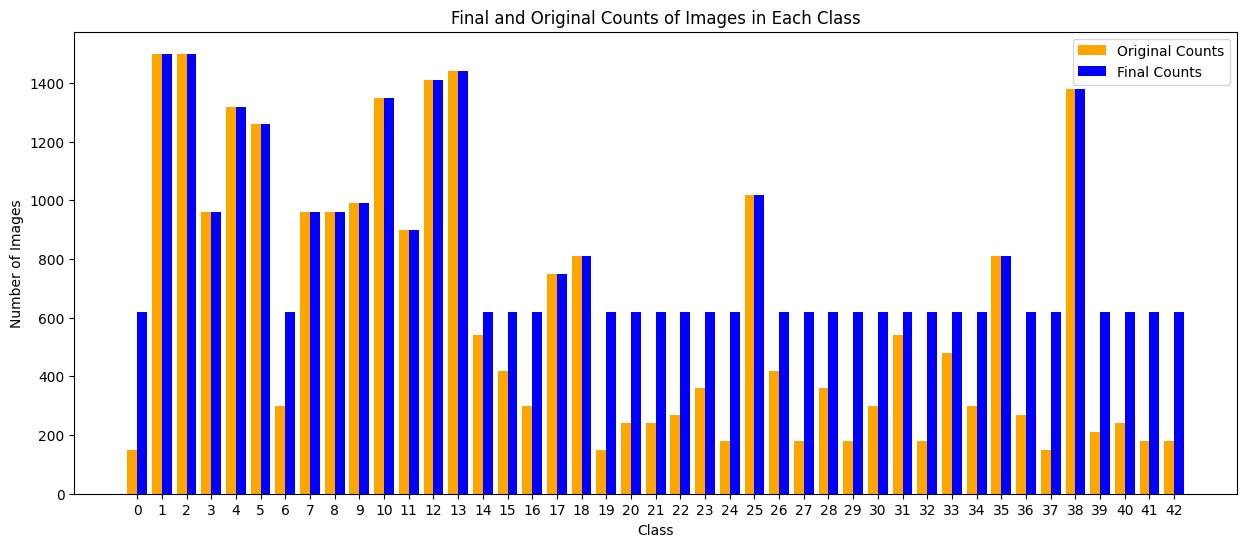

In [48]:
# Calculate the counts of images in each class for both final and original data
final_class_counts = np.bincount(final_labels)
original_class_counts = np.bincount(labels)

# Number of classes
num_classes = len(final_class_counts)

# Create an array of class labels
class_labels = np.arange(num_classes)

# Calculate the bar width and the gap between original and final counts
bar_width = 0.4
gap = 0.2

# Calculate the positions for the bars
original_bar_positions = class_labels * (2 * bar_width + gap) - bar_width / 2
final_bar_positions = class_labels * (2 * bar_width + gap) + bar_width / 2

# Plot the graph
plt.figure(figsize=(15, 6))

# Plot original counts in orange
plt.bar(original_bar_positions, original_class_counts, color='orange', width=bar_width, label='Original Counts')

# Plot final counts in blue
plt.bar(final_bar_positions, final_class_counts, color='blue', width=bar_width, label='Final Counts')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Final and Original Counts of Images in Each Class')
plt.xticks(class_labels * (2 * bar_width + gap), class_labels)  # Adjust xticks positions
plt.legend()
plt.show()


Saving processed images for machine learning in a different instance with GPU.

In [49]:
# Define the folder path to save the images
save_folder = "/content/augmented_images"
os.makedirs(save_folder, exist_ok=True)

# Save augmented images to the folder
for i, image in enumerate(final_images):
    class_label = final_labels[i]
    filename = f"{class_label}_{i}.png"
    file_path = os.path.join(save_folder, filename)
    cv2.imwrite(file_path, image)

# Create a list of dictionaries for DataFrame
data = []
for i in range(len(final_images)):
    class_label = final_labels[i]
    filename = f"{class_label}_{i}.png"
    data.append({"class": class_label, "filename": filename})

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)

print("Images saved and DataFrame created.")

Images saved and DataFrame created.


In [50]:
# Specify the directory path
folder_path = '/content/augmented_images'

# List all files in the directory
file_list = os.listdir(folder_path)

# Count the number of files
num_files = len(file_list)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 35440


In [55]:
shutil.make_archive('/content/augmented_images', 'zip', save_folder)

# Move the zip file to Google Drive
zip_path = '/content/augmented_images.zip'
drive_save_path = '/content/drive/MyDrive/final/data/final_imageRRDB.zip'
shutil.move(zip_path, drive_save_path)

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/final/data/image_dataRRDB.csv", index=False)

print("Images and DataFrame created saved to Google Drive.")

Images and DataFrame created saved to Google Drive.


In [ ]:
# # Specify the path to the folder you want to delete entries from
# folder_path = '/content/train_images_enhanced'  # Replace with your folder path

# # List all files in the folder
# folder_contents = os.listdir(folder_path)

# # Iterate through the files and delete them
# for item in folder_contents:
#     item_path = os.path.join(folder_path, item)
#     if os.path.isfile(item_path):
#         os.remove(item_path)
#     elif os.path.isdir(item_path):
#         shutil.rmtree(item_path)

# print("All entries in 'test_images_enhance' have been deleted.")